# YouTube Statistics
## By: Jakob Garcia
April 2023 – May 2023

Hello! Welcome to my data engineering and analysis project about YouTube video data. In this notebook, I used libraries like Pandas to clean the data files and create tables. I then pushed those tables into an AWS database so that I could use PostgreSQL through the Psycopg2 library in order to analyze the data using queries. The data in this notebook comes from a CSV file and a JSON file to create data frames about various YouTube statistics. All of the files I am using come from the following source:
> https://www.kaggle.com/datasets/datasnaek/youtube-new

The file names are:

>US_category_id.json

>USvideos.csv

This project was originally done in a Google Colab Jupyter notebook where I accessed the files from my Google drive. But, in order to have the notebook be easily ran on any device without the files, I have downloaded the files and uploaded them to my Google Drive, and am opening them using a link from there.

Using the original data, I created 3 different tables that are pushed to my database and are used to run SQL queries on. I also made a few different plots that explore what the data can be used for.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# Create the 'categories' table

The categories table is designed to hold all of the keys to specific video categories that videos could be listed as.

In [ ]:
# The program downloads the US_category_id.json file from my drive and reads it
url='https://drive.google.com/file/d/1zmMyqWYvCFPT0IRs42IDOp37MVFtnL9L/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
categories_raw = pd.read_json(url)
categories_raw.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
# Here we look a bit inside the data to find the keys that hold the data we want. We are mainly wanting the 'id' and 'title' keys.
categories_raw['items'][0]
for i in range(len(categories_raw['items'])):
  print(categories_raw['items'][i])

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec"', 'id': '17', 'snippet': {'channelId': 'UC

In [ ]:
# This code is used to extract all the data we want from the JSON
categories_data = {'id':[], 'category':[]}
for i in range(len(categories_raw['items'])):
  categories_data['id'].append(int(categories_raw['items'][i]['id']))
  categories_data['category'].append(categories_raw['items'][i]['snippet']['title'])
categories_data

{'id': [1,
  2,
  10,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 'category': ['Film & Animation',
  'Autos & Vehicles',
  'Music',
  'Pets & Animals',
  'Sports',
  'Short Movies',
  'Travel & Events',
  'Gaming',
  'Videoblogging',
  'People & Blogs',
  'Comedy',
  'Entertainment',
  'News & Politics',
  'Howto & Style',
  'Education',
  'Science & Technology',
  'Nonprofits & Activism',
  'Movies',
  'Anime/Animation',
  'Action/Adventure',
  'Classics',
  'Comedy',
  'Documentary',
  'Drama',
  'Family',
  'Foreign',
  'Horror',
  'Sci-Fi/Fantasy',
  'Thriller',
  'Shorts',
  'Shows',
  'Trailers']}

In [ ]:
# We then use the extracted data and turn it into a Pandas data frame
categories = pd.DataFrame(categories_data)
categories

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [ ]:
# Getting rid of the duplicate category. This copy goes unused in the other data we will get later.
categories = categories.drop(index=21)

In [ ]:
# Now to fix the index since we dropped a row
categories = categories.reset_index()
categories = categories.drop('index',1)
categories

<ipython-input-255-16dd707a496b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categories = categories.drop('index',1)


,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


# Create the YouTube data frame

The youtube_df is used to store most of our base data. It is used to make other tables later.

In [ ]:
# We are now moving on to the main source of our data, the USvideos.csv file. Like before the file is being downloaded from my drive and then read.
url='https://drive.google.com/file/d/14ip9_3-Fp64-S-BHUbUjPHCx3uYiydzr/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
youtube_df = pd.read_csv(url)
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Here, we are fixing the 'publish_time' column by turning it into a datetime format. It also had the issue of wanting to be localized by a timezone, so I fixed that too.
youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time']).dt.tz_localize(None)
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# This is turning the 'trending_date' column into a datetime format as well. This one had the issue of being in a funky form, so I had to set a specific format to change it by.
youtube_df['trending_date'] = pd.to_datetime(youtube_df['trending_date'], format='%y.%d.%m')
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# In order to get our tables into a standarized format, we are sorting the rows to be alphabetically in order.
# We are then factorizing based on the channel_title column to create the channel_id column.
youtube_df = youtube_df.sort_values('channel_title')
youtube_df['channel_id'] = pd.factorize(youtube_df['channel_title'])[0]

In [ ]:
# Next, we are fixing some of the datatypes within the table so that they are usable later on.
# We are also resetting the index since we just sorted the table, and the index is out of order.
youtube_df['video_id'] = youtube_df['video_id'].astype('string')
youtube_df['title'] = youtube_df['title'].astype('string')
youtube_df['channel_title'] = youtube_df['channel_title'].astype('string')
youtube_df['description'] = youtube_df['description'].astype('string')
youtube_df = youtube_df.reset_index()
youtube_df = youtube_df.drop('index',1)
youtube_df

<ipython-input-260-5e10ddd84a3e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  youtube_df = youtube_df.drop('index',1)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,channel_id
0,9KIP-Ncp2jU,2017-11-15,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",85643,170,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...,0
1,9KIP-Ncp2jU,2017-11-16,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",92327,182,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...,0
2,WdOGSNQP9b4,2018-03-09,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,"choreography|""1million dance studio""|""원밀리언 댄스 ...",307249,21782,214,762,https://i.ytimg.com/vi/WdOGSNQP9b4/default.jpg,False,False,False,Jun Liu teaches choreography to This is me by ...,1
3,WdOGSNQP9b4,2018-03-15,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,"choreography|""1million dance studio""|""원밀리언 댄스 ...",479904,29124,276,920,https://i.ytimg.com/vi/WdOGSNQP9b4/default.jpg,False,False,False,Jun Liu teaches choreography to This is me by ...,1
4,XKl8Wg25DrM,2018-04-16,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1MILLION Dance Studio,24,2018-04-10 12:00:05,"choreography|""1million dance studio""|""원밀리언 댄스 ...",657867,57025,646,7500,https://i.ytimg.com/vi/XKl8Wg25DrM/default.jpg,False,False,False,Rikimaru teaches choreography to Joga O Bum Bu...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,VioegwSjypk,2018-01-06,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,영국남자 Korean Englishman,23,2018-01-03 11:31:18,"Korean|""영국남자""|""영국""|""조쉬""|""올리""|""Josh""|""Ollie""|""K...",1019288,25129,454,2831,https://i.ytimg.com/vi/VioegwSjypk/default.jpg,False,False,False,이번 시리즈 예고편: https://youtu.be/TlVAqQnggzI\n오늘은 ...,2206
40945,VioegwSjypk,2018-01-05,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,영국남자 Korean Englishman,23,2018-01-03 11:31:18,"Korean|""영국남자""|""영국""|""조쉬""|""올리""|""Josh""|""Ollie""|""K...",890350,23424,405,2649,https://i.ytimg.com/vi/VioegwSjypk/default.jpg,False,False,False,이번 시리즈 예고편: https://youtu.be/TlVAqQnggzI\n오늘은 ...,2206
40946,VioegwSjypk,2018-01-09,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,영국남자 Korean Englishman,23,2018-01-03 11:31:18,"Korean|""영국남자""|""영국""|""조쉬""|""올리""|""Josh""|""Ollie""|""K...",1202392,27324,501,3060,https://i.ytimg.com/vi/VioegwSjypk/default.jpg,False,False,False,이번 시리즈 예고편: https://youtu.be/TlVAqQnggzI\n오늘은 ...,2206
40947,VioegwSjypk,2018-01-04,한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!,영국남자 Korean Englishman,23,2018-01-03 11:31:18,"Korean|""영국남자""|""영국""|""조쉬""|""올리""|""Josh""|""Ollie""|""K...",588820,18317,254,2214,https://i.ytimg.com/vi/VioegwSjypk/default.jpg,False,False,False,이번 시리즈 예고편: https://youtu.be/TlVAqQnggzI\n오늘은 ...,2206


In [ ]:
# Double checking that all of the datatypes are in the correct formats.
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  string        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  string        
 3   channel_title           40949 non-null  string        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [ ]:
# Checking the shape of the data frame to make sure everything is good.
youtube_df.shape

(40949, 17)

In [ ]:
# Also checking that the factorize is at the right length
print(youtube_df['channel_id'].drop_duplicates())

0           0
2           1
35          2
54          3
189         4
         ... 
40894    2202
40900    2203
40912    2204
40941    2205
40943    2206
Name: channel_id, Length: 2207, dtype: int64


In [ ]:
# Now let's drop some of the unnecessary columns.
youtube_df = youtube_df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'tags', 'description'], 1)
youtube_df.head()

<ipython-input-264-b94ae81868b8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  youtube_df = youtube_df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'tags', 'description'], 1)


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,channel_id
0,9KIP-Ncp2jU,2017-11-15,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,85643,170,45,0,0
1,9KIP-Ncp2jU,2017-11-16,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,92327,182,45,0,0
2,WdOGSNQP9b4,2018-03-09,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,307249,21782,214,762,1
3,WdOGSNQP9b4,2018-03-15,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,479904,29124,276,920,1
4,XKl8Wg25DrM,2018-04-16,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1MILLION Dance Studio,24,2018-04-10 12:00:05,657867,57025,646,7500,1


# Creating videos data frame 

We are creating the videos data frame here. It is similar to the youtube_df, but the key difference between them is that the youtube_df has several instances of the same video if it trended more than once. The videos data frame only has the last instance recorded of each video, so each video is unique.

In [ ]:
# We are now moving on to creating the videos data frame. Within the youtube_df, there are a few instances where two different videos from different channels
# have the same video_id, so in order to get each unique video and not ignore any, we first create a unique_video_id column within youtube_df.
youtube_df['unique_video_id'] = youtube_df['channel_title'] + youtube_df['video_id']

In [ ]:
# Now to create the videos data frame, we are sorting the data frame by the unique_video_id column and the trending_date column, so that we can then
# drop all of the duplicates, but keep the last instance of each unique video. We then sort it by the channel_title column again so that it is in the same
# format as before, and then fix the index from sorting.
videos = youtube_df.sort_values(['unique_video_id', 'trending_date']).drop_duplicates('unique_video_id', keep='last')
videos = videos.sort_values('channel_title')
videos = videos.reset_index()
videos = videos.drop('index',1)
videos

<ipython-input-266-0d589d3b53a0>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  videos = videos.drop('index',1)


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,channel_id,unique_video_id
0,9KIP-Ncp2jU,2017-11-16,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,92327,182,45,0,0,12 News9KIP-Ncp2jU
1,QRq0pkr2TWM,2018-02-26,Cheap Thrills - Sia / Tina Boo Choreography,1MILLION Dance Studio,24,2018-02-19 12:00:02,627933,28580,340,444,1,1MILLION Dance StudioQRq0pkr2TWM
2,WdOGSNQP9b4,2018-03-19,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,564951,32030,292,928,1,1MILLION Dance StudioWdOGSNQP9b4
3,XKl8Wg25DrM,2018-04-25,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1MILLION Dance Studio,24,2018-04-10 12:00:05,1000242,69778,857,8283,1,1MILLION Dance StudioXKl8Wg25DrM
4,_xwX82Y0Oro,2018-03-07,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,1MILLION Dance Studio,24,2018-02-28 09:00:03,992294,48246,453,854,1,1MILLION Dance Studio_xwX82Y0Oro
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,QF031DwMffQ,2017-12-08,『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定】,ワーナー ブラザース 公式チャンネル,1,2017-12-01 09:06:02,1516682,30827,1237,4451,2202,ワーナー ブラザース 公式チャンネルQF031DwMffQ
6360,MeNR0guNn70,2018-03-16,世界で一番切れるパスタの包丁を作りたい！,圧倒的不審者の極み!,28,2018-03-03 16:16:15,1353109,16766,1370,5417,2203,圧倒的不審者の極み!MeNR0guNn70
6361,MAjY8mCTXWk,2018-06-11,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14 15:59:47,21957640,140214,10716,15418,2204,杰威爾音樂 JVR MusicMAjY8mCTXWk
6362,smRlXuBcp3c,2017-12-08,"2017-11-30-中國文化大學彩虹縮時(Taiwan,Taipei,CCU) Thr...",郭韋辰,28,2017-11-30 16:44:51,14370,51,1,4,2205,郭韋辰smRlXuBcp3c


In [ ]:
# Checking whether any of our data is null from our conversions.
videos.isnull().sum()

video_id           0
trending_date      0
title              0
channel_title      0
category_id        0
publish_time       0
views              0
likes              0
dislikes           0
comment_count      0
channel_id         0
unique_video_id    0
dtype: int64

In [ ]:
# We discarded a lot of the information about when videos trended more than once, so this data frame is used to get a count of all of the times a video trended.
trend_count = youtube_df.groupby([youtube_df['unique_video_id']]).agg({'trending_date':['count']})
trend_count = trend_count.reset_index()
trend_count.columns = ['unique_video_id','trending_count']
trend_count

,unique_video_id,trending_count
0,12 News9KIP-Ncp2jU,2
1,1MILLION Dance StudioQRq0pkr2TWM,2
2,1MILLION Dance StudioWdOGSNQP9b4,12
3,1MILLION Dance StudioXKl8Wg25DrM,12
4,1MILLION Dance Studio_xwX82Y0Oro,7
...,...,...
6359,ワーナー ブラザース 公式チャンネルQF031DwMffQ,6
6360,圧倒的不審者の極み!MeNR0guNn70,12
6361,杰威爾音樂 JVR MusicMAjY8mCTXWk,29
6362,郭韋辰smRlXuBcp3c,2


In [ ]:
# We now add the trending_count column to the videos data frame by merging the two data frames. Our videos data frame now shows how many times a video has trended.
videos = videos.merge(trend_count)
videos

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,channel_id,unique_video_id,trending_count
0,9KIP-Ncp2jU,2017-11-16,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11 01:03:01,92327,182,45,0,0,12 News9KIP-Ncp2jU,2
1,QRq0pkr2TWM,2018-02-26,Cheap Thrills - Sia / Tina Boo Choreography,1MILLION Dance Studio,24,2018-02-19 12:00:02,627933,28580,340,444,1,1MILLION Dance StudioQRq0pkr2TWM,2
2,WdOGSNQP9b4,2018-03-19,This is me - The Greatest Showman OST / Jun Li...,1MILLION Dance Studio,24,2018-03-07 12:00:04,564951,32030,292,928,1,1MILLION Dance StudioWdOGSNQP9b4,12
3,XKl8Wg25DrM,2018-04-25,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1MILLION Dance Studio,24,2018-04-10 12:00:05,1000242,69778,857,8283,1,1MILLION Dance StudioXKl8Wg25DrM,12
4,_xwX82Y0Oro,2018-03-07,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,1MILLION Dance Studio,24,2018-02-28 09:00:03,992294,48246,453,854,1,1MILLION Dance Studio_xwX82Y0Oro,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,QF031DwMffQ,2017-12-08,『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定】,ワーナー ブラザース 公式チャンネル,1,2017-12-01 09:06:02,1516682,30827,1237,4451,2202,ワーナー ブラザース 公式チャンネルQF031DwMffQ,6
6360,MeNR0guNn70,2018-03-16,世界で一番切れるパスタの包丁を作りたい！,圧倒的不審者の極み!,28,2018-03-03 16:16:15,1353109,16766,1370,5417,2203,圧倒的不審者の極み!MeNR0guNn70,12
6361,MAjY8mCTXWk,2018-06-11,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14 15:59:47,21957640,140214,10716,15418,2204,杰威爾音樂 JVR MusicMAjY8mCTXWk,29
6362,smRlXuBcp3c,2017-12-08,"2017-11-30-中國文化大學彩虹縮時(Taiwan,Taipei,CCU) Thr...",郭韋辰,28,2017-11-30 16:44:51,14370,51,1,4,2205,郭韋辰smRlXuBcp3c,2


In [ ]:
# Checking whether all of our numbers make sense.
videos.describe()

,category_id,views,likes,dislikes,comment_count,channel_id,trending_count
count,6364.000000,6.364000e+03,6.364000e+03,6.364000e+03,6.364000e+03,6364.000000,6364.000000
mean,20.423476,1.959542e+06,5.550573e+04,3.062996e+03,6.444084e+03,1118.553740,6.434475
std,7.230209,7.053162e+06,1.936446e+05,3.195601e+04,3.379019e+04,629.544312,4.642791
min,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,17.000000,1.590532e+05,2.772750e+03,1.270000e+02,3.720000e+02,570.750000,3.000000
50%,24.000000,5.173405e+05,1.190250e+04,4.440000e+02,1.266500e+03,1129.000000,6.000000
75%,25.000000,1.470616e+06,3.840575e+04,1.504000e+03,4.053250e+03,1713.000000,8.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,2206.000000,30.000000


In [ ]:
# Comparing the values for trending_count above to the original data frame to make sure all values passed properly.
trend_count.describe()

,trending_count
count,6364.000000
mean,6.434475
std,4.642791
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,30.000000


In [ ]:
# Since we are only interested in how many times a video has trended, we can discard the trending_date column since that only shows the last time a video trended.
videos = videos.drop('trending_date',1)

<ipython-input-272-4e9b9aecd473>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  videos = videos.drop('trending_date',1)


# Creating channels data frame

The channels data frame contains the channel_id key which is used to access the title of that channel.

In [ ]:
# Let's now make the channels data frame. We can use our videos data frame to get all of the unique listings of channels that have posted videos.
channels = videos[['channel_id','channel_title']].drop_duplicates()
channels = channels.reset_index()
channels = channels.drop('index',1)
channels

<ipython-input-273-c8c3047ec4ae>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  channels = channels.drop('index',1)


,channel_id,channel_title
0,0,12 News
1,1,1MILLION Dance Studio
2,2,1theK (원더케이)
3,3,20th Century Fox
4,4,2CELLOS
...,...,...
2202,2202,ワーナー ブラザース 公式チャンネル
2203,2203,圧倒的不審者の極み!
2204,2204,杰威爾音樂 JVR Music
2205,2205,郭韋辰


In [ ]:
# Now that we have the channel_title column stored in another table, we can drop the channel_title column in videos. We are also dropping the video_id column
# because it is no longer needed past this point. Finally, the columns of videos are all organized to be easier to read.
videos = videos.drop(['channel_title', 'video_id'],1)
videos = videos[['unique_video_id','title','channel_id','category_id','trending_count','views','likes','dislikes','comment_count','publish_time']]
videos

<ipython-input-274-a37207e61011>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  videos = videos.drop(['channel_title', 'video_id'],1)


,unique_video_id,title,channel_id,category_id,trending_count,views,likes,dislikes,comment_count,publish_time
0,12 News9KIP-Ncp2jU,Bill Gates bought land in Arizona to build tec...,0,22,2,92327,182,45,0,2017-11-11 01:03:01
1,1MILLION Dance StudioQRq0pkr2TWM,Cheap Thrills - Sia / Tina Boo Choreography,1,24,2,627933,28580,340,444,2018-02-19 12:00:02
2,1MILLION Dance StudioWdOGSNQP9b4,This is me - The Greatest Showman OST / Jun Li...,1,24,12,564951,32030,292,928,2018-03-07 12:00:04
3,1MILLION Dance StudioXKl8Wg25DrM,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1,24,12,1000242,69778,857,8283,2018-04-10 12:00:05
4,1MILLION Dance Studio_xwX82Y0Oro,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,1,24,7,992294,48246,453,854,2018-02-28 09:00:03
...,...,...,...,...,...,...,...,...,...,...
6359,ワーナー ブラザース 公式チャンネルQF031DwMffQ,『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定】,2202,1,6,1516682,30827,1237,4451,2017-12-01 09:06:02
6360,圧倒的不審者の極み!MeNR0guNn70,世界で一番切れるパスタの包丁を作りたい！,2203,28,12,1353109,16766,1370,5417,2018-03-03 16:16:15
6361,杰威爾音樂 JVR MusicMAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",2204,10,29,21957640,140214,10716,15418,2018-05-14 15:59:47
6362,郭韋辰smRlXuBcp3c,"2017-11-30-中國文化大學彩虹縮時(Taiwan,Taipei,CCU) Thr...",2205,28,2,14370,51,1,4,2017-11-30 16:44:51


# SQL Set Up

Here I am pushing all of the main tables created into my AWS database.

In [ ]:
# Setting up the connection to my database. In order to keep my database private, 
# I've left place holder text in the connection. 
import psycopg2
def get_conn_cur():
 conn = psycopg2.connect(
    host="hostaddress.amazonaws.com",
    database="database_name",
    user="jakob",
    password="********",
    port='port_id')

 cur = conn.cursor()
 return(conn, cur)

In [ ]:
# SQL functions obtained from a past 'Data Engineering' class 

# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string 

 my_data = cur.fetchall() # fetch query data 

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # argument of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # execute
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
 conn, cur = get_conn_cur() # get connection and cursor

 # query to get table names
 table_name_query = """SELECT table_name FROM information_schema.tables """

 cur.execute(table_name_query) # execute
 my_data = cur.fetchall() # fetch results

 cur.close() #close cursor
 conn.close() # close connection

 return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # execute
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

In [ ]:
# Code to drop a table if needed
# Don't run on accident!
'''
conn, cur = get_conn_cur()
table_name = 'TABLE' # what table to drop
drop_table_statement = "DROP TABLE %s;"%table_name # make your statement
cur.execute(drop_table_statement) # execute it
conn.commit()
cur.close() # close your cursor
'''

## Pushing videos

In [ ]:
conn, cur = get_conn_cur()

tq = """CREATE TABLE videos (
     unique_video_id VARCHAR(255) PRIMARY KEY,
     title VARCHAR(255) NOT NULL ,
     channel_id BIGINT NOT NULL,
     category_id BIGINT NOT NULL,
     trending_count BIGINT NOT NULL,
     views BIGINT NOT NULL,
     likes BIGINT NOT NULL,
     dislikes BIGINT NOT NULL,
     comment_count BIGINT NOT NULL,
     publish_time TIMESTAMP NOT NULL
     );"""
cur.execute(tq)
conn.commit()

In [ ]:
videos_np = videos.to_numpy();
data_tups = [tuple(x) for x in videos_np]

iq = """INSERT INTO videos(unique_video_id,title,channel_id,category_id,trending_count,views,likes,dislikes,comment_count,publish_time) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='videos')

,unique_video_id,title,channel_id,category_id,trending_count,views,likes,dislikes,comment_count,publish_time
0,12 News9KIP-Ncp2jU,Bill Gates bought land in Arizona to build tec...,0,22,2,92327,182,45,0,2017-11-11 01:03:01
1,1MILLION Dance StudioQRq0pkr2TWM,Cheap Thrills - Sia / Tina Boo Choreography,1,24,2,627933,28580,340,444,2018-02-19 12:00:02
2,1MILLION Dance StudioWdOGSNQP9b4,This is me - The Greatest Showman OST / Jun Li...,1,24,12,564951,32030,292,928,2018-03-07 12:00:04
3,1MILLION Dance StudioXKl8Wg25DrM,Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...,1,24,12,1000242,69778,857,8283,2018-04-10 12:00:05
4,1MILLION Dance Studio_xwX82Y0Oro,FRIENDS - Marshmello & Anne-Marie / Tina Boo C...,1,24,7,992294,48246,453,854,2018-02-28 09:00:03


## Pushing channels

In [ ]:
conn, cur = get_conn_cur()

tq = """CREATE TABLE channels (
     channel_id BIGINT PRIMARY KEY,
     channel_titles VARCHAR(255) NOT NULL
     );"""
cur.execute(tq)
conn.commit()

In [ ]:
channels_np = channels.to_numpy();
data_tups = [tuple(x) for x in channels_np]

iq = """INSERT INTO channels(channel_id,channel_titles) VALUES(%s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='channels')

,channel_id,channel_titles
0,0,12 News
1,1,1MILLION Dance Studio
2,2,1theK (원더케이)
3,3,20th Century Fox
4,4,2CELLOS


## Pushing categories

In [ ]:
conn, cur = get_conn_cur()

tq = """CREATE TABLE categories(
     id BIGINT PRIMARY KEY,
     category VARCHAR(255) NOT NULL
     );"""
cur.execute(tq)
conn.commit()

In [ ]:
categories_np = categories.to_numpy();
data_tups = [tuple(x) for x in categories_np]

iq = """INSERT INTO categories(id,category) VALUES(%s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='categories')

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


# SQL Queries

Now that all of the tables have been pushed into my AWS, we can start running some queries on the data. This section is mostly focused on exploring the data through grouping and aggregating.

First, let's find some channels that post content in the "Pets & Animals" category (category_id = 15)

In [ ]:
sq = """ SELECT * FROM channels
            WHERE channel_id IN (SELECT channel_id FROM videos WHERE category_id = 15)
            LIMIT 20;"""
run_query(sq)

(['channel_id', 'channel_titles'],
 [(19, 'A Chick Called Albert'),
  (35, 'AaronsAnimals'),
  (91, 'Animal Adventure Park'),
  (93, 'AnimalWised'),
  (101, 'AntsCanada'),
  (141, 'BBC Earth'),
  (143, 'BBC News'),
  (163, 'Barcroft Animals'),
  (164, 'Barn Sanctuary'),
  (201, 'Big Cat Rescue'),
  (213, 'Bini the Bunny'),
  (244, 'Brave Wilderness'),
  (338, 'Cat Man Chris'),
  (340, 'CatPusic'),
  (371, 'Chris Turner'),
  (407, 'Cole and Marmalade'),
  (436, 'Crusoe the Celebrity Dachshund'),
  (483, 'Dean Anderson'),
  (575, 'Emma Massingale'),
  (639, 'Fontgod')])

There are quite a bit of people that post animal related content, and we can see that some channels even have animal related themes in their channel titles.



Now let's find channels in that same category that have a total of over 3,000,000 views

In [ ]:
sq = """SELECT channel_titles, SUM(views)
        FROM videos
        JOIN channels ON channels.channel_id = videos.channel_id
        WHERE category_id = 15 AND views>3000000
        GROUP BY channel_titles;"""
run_query(sq)

(['channel_titles', 'sum'],
 [('A Chick Called Albert', Decimal('4253449')),
  ('Brave Wilderness', Decimal('10238445')),
  ('camelsandfriends', Decimal('5985284')),
  ('Helpful Vancouver Vet', Decimal('3612568')),
  ('The Dodo', Decimal('8841052'))])

There are only 5 channels from the table that have over 3 million views, with 'Brave Wilderness' being the one with the greatest view count.

Let's now find which category is the most popular in terms of viewer interactions by getting the ratio of comments to views.

In [ ]:
sq = """SELECT category, ROUND((SUM(comment_count)/SUM(views))*100,2) as viewer_interaction_percent
        FROM videos
        JOIN categories ON id = category_id
        GROUP BY category
        ORDER BY viewer_interaction_percent DESC
        LIMIT 3;"""
run_query(sq)

(['category', 'viewer_interaction_percent'],
 [('Nonprofits & Activism', Decimal('2.38')),
  ('Gaming', Decimal('0.58')),
  ('Howto & Style', Decimal('0.52'))])

Viewer interactions are usually low since most people do not post comments on every video, but the ratio of people commenting on charitable videos is quite high compared to everything else.

We will now compare every category based on their positivity ratio by dividing the total dislikes by the total likes.

In [ ]:
sq = """SELECT category, ROUND((1-(SUM(dislikes)/SUM(likes)))*100,2) as viewer_positivity_percent
        FROM videos
        JOIN categories ON id = category_id
        GROUP BY category
        ORDER BY viewer_positivity_percent DESC;"""
run_query(sq)

(['category', 'viewer_positivity_percent'],
 [('Shows', Decimal('97.65')),
  ('Pets & Animals', Decimal('97.46')),
  ('Howto & Style', Decimal('96.58')),
  ('Music', Decimal('96.50')),
  ('Education', Decimal('96.48')),
  ('Comedy', Decimal('96.43')),
  ('Film & Animation', Decimal('95.89')),
  ('Science & Technology', Decimal('94.61')),
  ('People & Blogs', Decimal('94.01')),
  ('Sports', Decimal('93.67')),
  ('Autos & Vehicles', Decimal('93.65')),
  ('Travel & Events', Decimal('93.30')),
  ('Gaming', Decimal('91.06')),
  ('Entertainment', Decimal('90.02')),
  ('Nonprofits & Activism', Decimal('76.42')),
  ('News & Politics', Decimal('74.43'))])

Most videos have a higher like count than dislike count, so it makes sense that most are high percents. It is interesting how "News & Politics" is the least positive category.

What videos were most popular each month in terms of views?

In [ ]:
# This is preparing a subquery
sq = """SELECT MAX(views) as max_views, to_char(publish_time, 'YYYY-MM') as month
        FROM videos
        WHERE views >= 10000
        GROUP BY month
        ORDER BY month ASC
;"""
run_query(sq)

(['max_views', 'month'],
 [(258506, '2006-07'),
  (50168, '2008-04'),
  (86897, '2008-06'),
  (26830, '2008-08'),
  (15476, '2009-03'),
  (45096, '2009-06'),
  (114105, '2009-09'),
  (99999, '2010-01'),
  (163780, '2010-04'),
  (73902, '2010-05'),
  (18015, '2010-09'),
  (95085, '2011-03'),
  (58689, '2011-05'),
  (20107, '2011-08'),
  (127640, '2011-11'),
  (52164, '2012-01'),
  (87215, '2012-02'),
  (177098, '2012-03'),
  (52124, '2012-09'),
  (127623, '2012-12'),
  (10692, '2013-03'),
  (139026, '2013-05'),
  (29305, '2013-07'),
  (21175, '2013-10'),
  (51610, '2014-01'),
  (339306, '2014-02'),
  (17702, '2014-03'),
  (99066, '2014-06'),
  (156712, '2014-08'),
  (54529, '2014-12'),
  (31505, '2015-03'),
  (193832, '2015-05'),
  (53000, '2015-06'),
  (500154, '2015-10'),
  (10655, '2016-05'),
  (33260, '2016-06'),
  (37346, '2016-10'),
  (17716, '2016-11'),
  (22768, '2017-02'),
  (19976, '2017-03'),
  (122634, '2017-04'),
  (218630, '2017-06'),
  (332114, '2017-08'),
  (28781, '2017

In [ ]:
# Used to compare length of output to the main query
print(len(run_query(sq)[1]))

53


In [ ]:
# This is the main query
sq = """SELECT title, max_views, month, unique_video_id
        FROM videos
        INNER JOIN (SELECT MAX(views) as max_views, to_char(publish_time, 'YYYY-MM') as month
        FROM videos WHERE views >= 10000 GROUP BY month)b ON b.month = month AND max_views = views
        ORDER BY month ASC
        ;"""
run_query(sq)

(['title', 'max_views', 'month', 'unique_video_id'],
 [('Budweiser - Original Whazzup? ad',
   258506,
   '2006-07',
   'dannotvMJO3FmmFuh4'),
  ('Kramer vs Kramer-Clou Scene',
   50168,
   '2008-04',
   'Livia GiustinianiUQtt9I6c-YM'),
  ("Behind The Sounds: That's Not Me",
   86897,
   '2008-06',
   'BehindTheSoundswFEAoF7RC7Y'),
  ('SAOIRSE RONAN - MORONIC (IRONIC)',
   26830,
   '2008-08',
   'flirppy242Y8JGfi4MJ8k'),
  ('Amazon.com commercial Xmas 1999Magnetic Whale Art',
   15476,
   '2009-03',
   'astroboy1960rO_mAQC9bv0'),
  ('The Smithereens - Blue Period',
   45096,
   '2009-06',
   'misleadingsilhouette2vQ_fnlvvr8'),
  ('The Cranberries - Dreams (Music Video HQ)',
   114105,
   '2009-09',
   'CrossKut316tYFYoLEO0dM'),
  ('The perfect ice - Ice boats on Lake Geneva',
   99999,
   '2010-01',
   'MattMasonPhotographyqC0I5PEhkJo'),
  ('Blade Vs Deacon Frost [Lightsaber Battle]',
   163780,
   '2010-04',
   'Jamie Demeter76c_nxhuVdM'),
  ('washing dishes by hand is better than us

In [ ]:
# The length is the same as the subquery
print(len(run_query(sq)[1]))

53


There are a lot of videos within the tables, but it is interesting to see the range of dates gathered from the data source.

What are the monthly stats of each channel for months where they have posted at least one video?

In [ ]:
sq = """SELECT channels.channel_titles, to_char(publish_time, 'YYYY-MM') as month, COUNT(unique_video_id) as monthly_video_count, SUM(likes) as monthly_likes, SUM(dislikes) as monthly_dislikes, SUM(views) as monthly_views, SUM(comment_count) as monthly_comment_count
        FROM videos
        JOIN channels ON channels.channel_id = videos.channel_id
        GROUP BY channels.channel_titles, month
        ORDER BY channels.channel_titles, month ASC
        LIMIT 10
        ;"""
run_query(sq)

(['channel_titles',
  'month',
  'monthly_video_count',
  'monthly_likes',
  'monthly_dislikes',
  'monthly_views',
  'monthly_comment_count'],
 [('12 News',
   '2017-11',
   1,
   Decimal('182'),
   Decimal('45'),
   Decimal('92327'),
   Decimal('0')),
  ('1MILLION Dance Studio',
   '2018-02',
   2,
   Decimal('76826'),
   Decimal('793'),
   Decimal('1620227'),
   Decimal('1298')),
  ('1MILLION Dance Studio',
   '2018-03',
   1,
   Decimal('32030'),
   Decimal('292'),
   Decimal('564951'),
   Decimal('928')),
  ('1MILLION Dance Studio',
   '2018-04',
   1,
   Decimal('69778'),
   Decimal('857'),
   Decimal('1000242'),
   Decimal('8283')),
  ('1theK (원더케이)',
   '2017-11',
   1,
   Decimal('181682'),
   Decimal('2062'),
   Decimal('1508950'),
   Decimal('9854')),
  ('1theK (원더케이)',
   '2018-01',
   4,
   Decimal('696907'),
   Decimal('11611'),
   Decimal('12194498'),
   Decimal('51931')),
  ('20th Century Fox',
   '2017-11',
   3,
   Decimal('418067'),
   Decimal('11048'),
   Decimal('1

This is a big output, but it's interesting to see how popular some channels are based on how often they post videos.

# Plots

Here are some data plots that showcase some of the data within the tables we created.

In [ ]:
# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

Let's find the most viewed category (music), and then make a graph of how often that category was posted in, in the year of 2018, and the views that each video got.

In [ ]:
# Find the most viewed category, and then filter based on category_id and publish_time
most_viewed_category = videos['category_id'][videos['views'] == videos['views'].max()].values[0]
most_viewed_df = videos[videos['category_id'] == most_viewed_category]
most_viewed_df = videos[(videos['category_id'] == most_viewed_category) & (videos['publish_time'] > pd.to_datetime('2017-12-31 23:59:59'))]
most_viewed_df = most_viewed_df.sort_values('publish_time')
most_viewed_df

,unique_video_id,title,channel_id,category_id,trending_count,views,likes,dislikes,comment_count,publish_time
6240,mariahxlambilyaBL027wEtg8,Mariah Carey - Live At Dick Clark's New Year's...,2128,10,7,1216232,0,0,5286,2018-01-01 05:30:01
3864,Piece Of Me Tour Planet HollywoodBmn2STJUWJs,Britney Spears - Toxic [Full HD] (New Year's E...,1387,10,8,475296,4504,2774,2223,2018-01-01 06:10:43
499,Big MarvelWkZVm_o3Sy4,Camila Cabello - Havana ( cover by Big Marvel ),202,10,5,533105,45076,443,2977,2018-01-01 12:33:16
6216,justintimberlakeVEVObVU-MmJZFFA,Justin Timberlake - INTRODUCING MAN OF THE WOODS,2111,10,2,1402868,29970,1940,4023,2018-01-02 15:00:04
748,BØRNSmusicVEVOvUiE_0GPqKE,"BØRNS, Lana Del Rey - God Save Our Young Blood...",275,10,7,1272955,60978,1401,4316,2018-01-02 17:00:06
...,...,...,...,...,...,...,...,...,...,...
3136,Maroon5VEVOmUYsp5baMXo,Maroon 5 - Three Little Birds,1124,10,5,5517903,243696,12874,16841,2018-06-09 07:01:01
3260,Michael DapaahqQn6TsbYrH8,BIG SHAQ - MAN DON'T DANCE (OFFICIAL MUSIC VIDEO),1167,10,3,6891734,400420,18159,36025,2018-06-10 21:00:18
4351,ShawnMendesVEVODGzy8FE1Rhk,Shawn Mendes - Nervous,1575,10,3,4986664,518240,5215,34466,2018-06-11 16:00:03
5497,TroyeSivanVEVOMrMAfMbZOmg,Troye Sivan - Dance To This (Official Audio) f...,1878,10,1,1473589,214511,2011,17455,2018-06-13 16:00:01


In [ ]:
categories[categories['id']==10]

,id,category
2,10,Music


In [ ]:
max(most_viewed_df['views'])

225211923

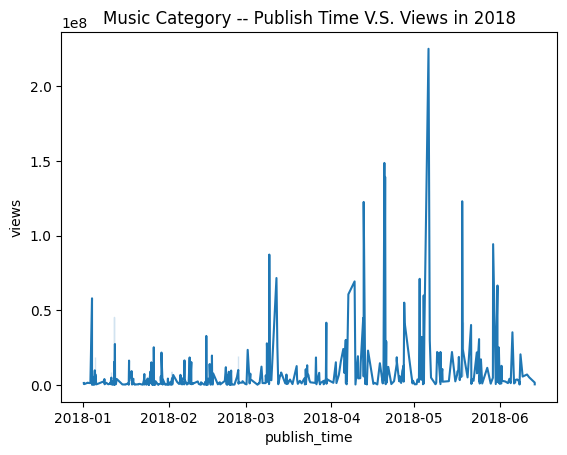

In [ ]:
sns.lineplot(data = most_viewed_df, x = 'publish_time', y = 'views')
plt.title("Music Category -- Publish Time V.S. Views in 2018")
plt.show()

Here we can see that there was a very high view count in May of 2018. It makes you wonder if it was one very popular video or several. 

Moving on, let's find which channel posted the most videos, and compare the publish time of those videos to their likes, to see if there is any sort of trend between likes and time.

In [ ]:
# Find the channel with the most videos, and then get the table of just that channel's videos
video_counts = videos.groupby('channel_id').agg({'unique_video_id':['count']})
video_counts = video_counts.reset_index()
video_counts.columns = ['channel_id', 'video_count']
num = int(video_counts[video_counts['video_count'] == video_counts['video_count'].max()]['channel_id'])
most_videos_channel = videos[videos['channel_id'] == num]
most_videos_channel

,unique_video_id,title,channel_id,category_id,trending_count,views,likes,dislikes,comment_count,publish_time
1475,ESPNbweX9_u7S0Y,First Take debates impact of Steph Curry and K...,555,17,5,444092,3240,229,1154,2018-03-26 14:30:58
1476,ESPNbtE8mDfEF34,Stephen A. on Cavaliers' NBA Finals Game 4: 'I...,555,17,2,1215945,10083,856,6475,2018-06-09 04:30:06
1477,ESPNbjG8nKYCEBQ,Sister Jean reacts to Loyola-Chicago reaching ...,555,17,1,150691,2790,68,583,2018-03-25 02:07:24
1478,ESPNbehWkJPCkLI,Stephen A.: Kevin Durant looked like he wanted...,555,17,2,1028031,8444,574,3825,2018-06-01 16:09:21
1479,ESPNagKDPntMv-E,Stephen A. Smith slams the Philadelphia 76ers ...,555,17,1,470191,4037,430,1553,2017-11-08 15:59:06
...,...,...,...,...,...,...,...,...,...,...
1554,ESPNC0KnxhQMLBU,Stephen A. Smith goes off after Game 2: It's t...,555,17,3,1527300,13847,669,4755,2018-06-04 03:30:54
1555,ESPNBEcs3TL8DII,LeBron James is 'obviously' the NBA MVP this s...,555,17,6,318840,2613,560,1952,2017-12-06 17:15:18
1556,ESPNA34O0pCAQ60,Urban Meyer reacts to Ohio State not making th...,555,17,1,47614,358,30,457,2017-12-03 20:27:49
1557,ESPNFI3zMdqq4vE,Tracy McGrady on Isaiah Thomas to the Lakers: ...,555,17,3,1249677,6703,290,1760,2018-02-08 19:07:05


In [ ]:
channels[channels['channel_id'] == 555]

,channel_id,channel_title
555,555,ESPN


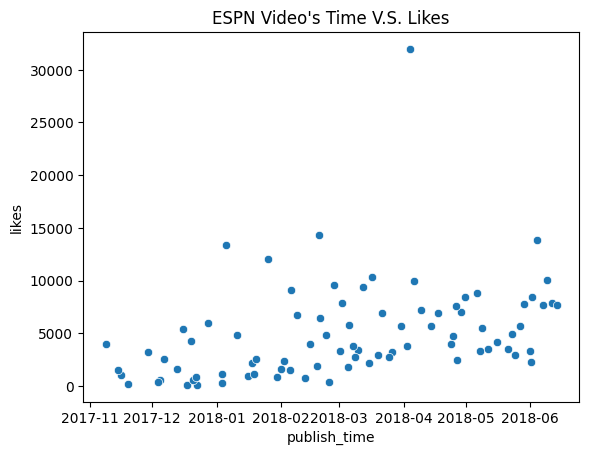

In [ ]:
sns.scatterplot(data = most_videos_channel, x = 'publish_time', y ='likes')
plt.title("ESPN Video's Time V.S. Likes")
plt.show()

There seems to be a slight linear trend between average likes and time. It's also interesting how massive of an outlier there was in April of 2018.

Now let's plot a graph of how many videos are in each video category.

In [ ]:
# Get a count of how many videos are in each category
category_count = videos.groupby('category_id').agg({'unique_video_id':['count']})
category_count = category_count.reset_index()
category_count.columns = ['category_id', 'video_count']
category_count

,category_id,video_count
0,1,321
1,2,71
2,10,805
3,15,140
4,17,450
5,19,59
6,20,103
7,22,499
8,23,546
9,24,1622


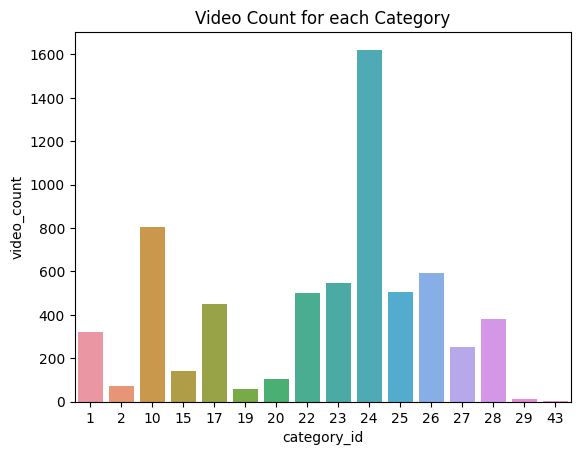

In [ ]:
sns.barplot(data = category_count, x='category_id', y='video_count')
plt.title("Video Count for each Category")
plt.show()

category_id 24 represents "Entertainment" based on the table we made earlier. This makes sense, as I think most people are using YouTube as a form of entertainment. 